In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data/data.csv')

# Preprocessing: Remove non-predictive columns
# 'id' is just an index, and 'Unnamed: 32' contains only null values
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Preprocessing: Encode the categorical target 'diagnosis' for the models
# Malignant (M) -> 1, Benign (B) -> 0
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])

# Define feature set (all numeric columns except the targets)
features = df.drop(columns=['diagnosis', 'diagnosis_encoded'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# Target: radius_mean (Continuous)
X_reg = features.drop(columns=['radius_mean'])
y_reg = df['radius_mean']

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model Training
reg_model = LinearRegression()
reg_model.fit(X_train_r, y_train_r)

# Prediction and Evaluation
y_pred_r = reg_model.predict(X_test_r)
print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_r, y_pred_r):.4f}")
print(f"R-squared (R2) Score: {r2_score(y_test_r, y_pred_r):.4f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.0048
R-squared (R2) Score: 0.9996


In [5]:
# Target: diagnosis_encoded (Categorical: 0 or 1)
X_cls = features
y_cls = df['diagnosis_encoded']

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Run Cross-Validation
cv_results = {}
print("--- Classification Model Performance (CV Accuracy) ---")
for name, model in models.items():
    scores = cross_val_score(model, X_cls, y_cls, cv=5)
    cv_results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

--- Classification Model Performance (CV Accuracy) ---
Logistic Regression: 0.9508
Decision Tree: 0.9173
Random Forest: 0.9561


/tmp/ipython-input-94572190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='magma')


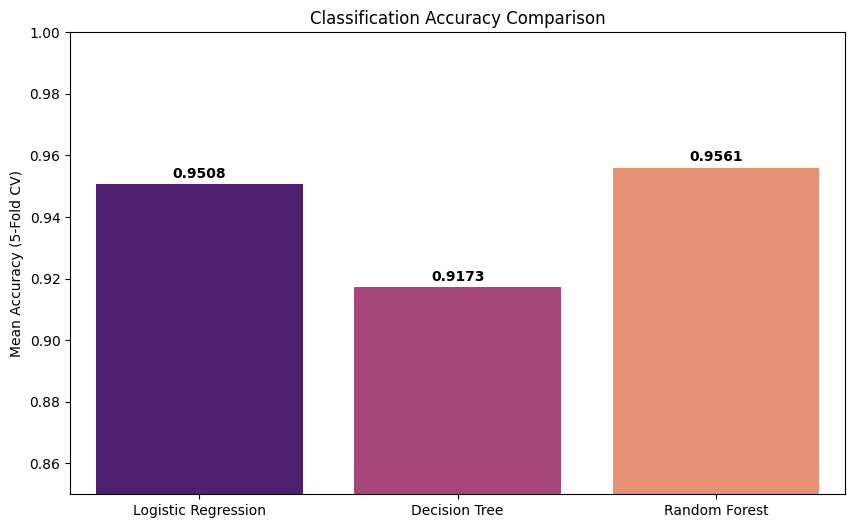

In [6]:
# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='magma')

plt.title('Classification Accuracy Comparison')
plt.ylabel('Mean Accuracy (5-Fold CV)')
plt.ylim(0.85, 1.0) # Zooming in to see the differences clearly

# Add text labels on top of bars
for i, v in enumerate(cv_results.values()):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center', fontweight='bold')

plt.show()